![](image.jpg)


Dive into the heart of data science with a project that combines healthcare insights and predictive analytics. As a Data Scientist at a top Health Insurance company, you have the opportunity to predict customer healthcare costs using the power of machine learning. Your insights will help tailor services and guide customers in planning their healthcare expenses more effectively.

## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is key to ensure the dataset is ready for modeling. Once your model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to your training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.

## Let's Get Started!

This project is your playground for applying data science in a meaningful way, offering insights that have real-world applications. Ready to explore the data and uncover insights that could revolutionize healthcare planning? Let's begin this exciting journey!

In [377]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

# Loading the insurance dataset
insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [378]:
insurance['charges'] = insurance['charges'].str.strip('$')
insurance['charges'] = insurance['charges'].astype(float)

In [379]:
# Implement model creation and training here
# Use as many cells as you need
print(insurance.isna().sum())
print(insurance.shape)
thres = 0.05*len(insurance)
print(thres)

age         66
sex         66
bmi         66
children    66
smoker      66
region      66
charges     66
dtype: int64
(1338, 7)
66.9


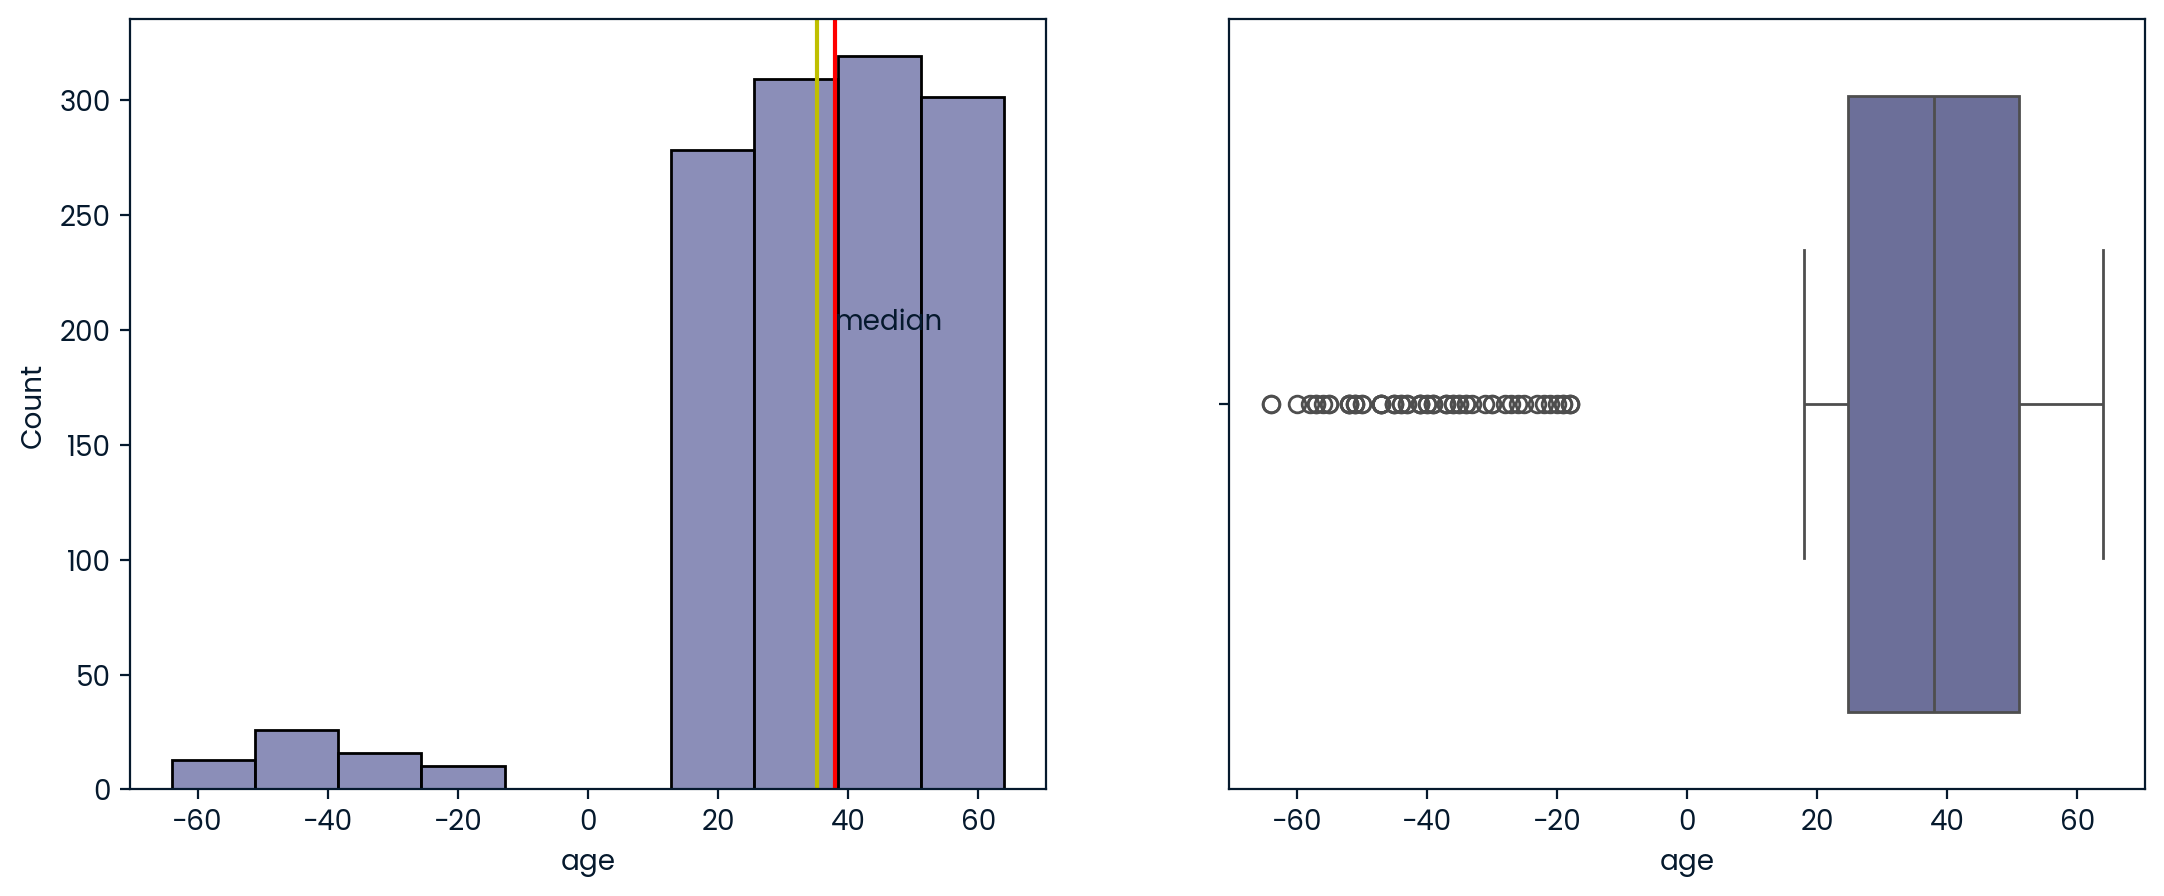

In [380]:
# Validating dataset
import matplotlib.pyplot as plt 
import seaborn as sns
insurance.query('age<0')['age']
fig, ax = plt.subplots(1,2, figsize=(13,5))
sns.histplot(data=insurance, x='age', bins= 10,  ax=ax[0])
ax[0].axvline(x=insurance['age'].median(), color='r')
ax[0].axvline(x=insurance['age'].mean(), color='y')
ax[0].annotate(xy=[insurance['age'].median(), 200], text='median') 
ax[1] = sns.boxplot(data=insurance, x='age')
plt.show()

In [381]:
# Missing values 
cols_to_drop = insurance.columns[insurance.isna().sum() <= thres]
cols_to_drop
insurance.dropna(subset=cols_to_drop, inplace = True)
insurance.isna().sum()
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [382]:
# Replacing ages less than zero with the median
# Median because the data is skewed
median = insurance['age'].median()
insurance.loc[insurance['age'] < 0 , 'age'] = median
insurance['age'] = insurance['age'].astype(int)
insurance['age'].dtype
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [383]:
# Children column
insurance['children'] = insurance['children'].astype(int)
insurance.query('children<0')['children']

34     -1
66     -2
84     -2
105    -1
129    -2
185    -3
225    -3
243    -3
267    -3
279    -1
297    -1
398    -2
431    -2
571    -1
578    -1
583    -1
621    -4
645    -3
653    -2
662    -1
667    -2
669    -1
691    -1
811    -3
853    -2
938    -2
941    -1
962    -1
968    -2
994    -3
1005   -2
1009   -1
1017   -2
1021   -3
1079   -3
1083   -1
1094   -4
1095   -4
1128   -1
1191   -1
1224   -1
1299   -1
Name: children, dtype: int64

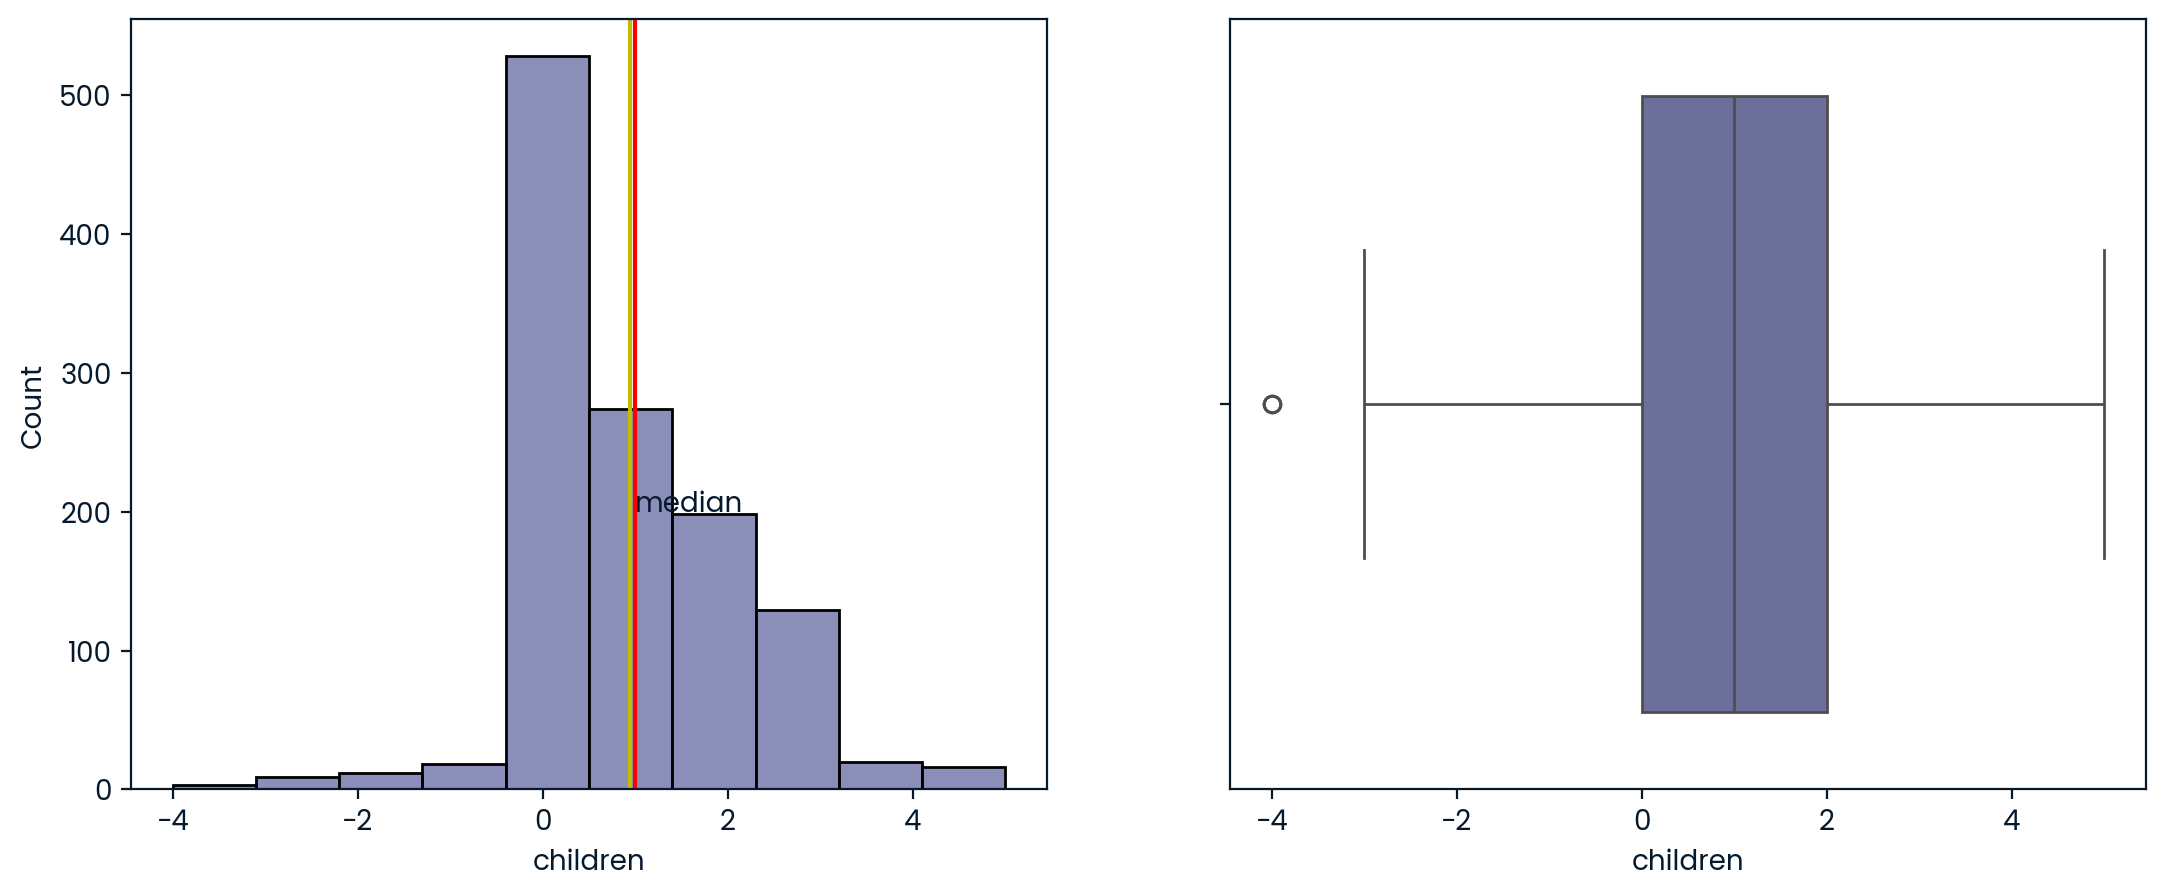

0.9411764705882353 1.0


In [384]:
insurance.query('children<0')['children']
fig, ax = plt.subplots(1,2, figsize=(13,5))
sns.histplot(data=insurance, x='children', bins= 10,  ax=ax[0])
ax[0].axvline(x=insurance['children'].median(), color='r')
ax[0].axvline(x=insurance['children'].mean(), color='y')
ax[0].annotate(xy=[insurance['children'].median(), 200], text='median') 
ax[1] = sns.boxplot(data=insurance, x='children')
plt.show()
print(insurance['children'].mean(), insurance['children'].median())

In [385]:
median_children = insurance['children'].median()
insurance.loc[insurance['children'] < 0 , 'children'] = median_children
insurance['age'].dtype
print(insurance['children'].ge(0).all())
insurance['children']

True


0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1207, dtype: int64

In [386]:
insurance['region'] = insurance['region'].str.lower()
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [387]:
print(insurance['sex'].unique())
insurance['sex'] = insurance['sex'].str.lower()
replace_map = { 'woman' : 'female',
                'man' : 'male' ,
                'f' : 'female',
                 'm' : 'male'}
insurance['sex'] = insurance['sex'].replace(replace_map)
insurance['sex'].value_counts()

['female' 'male' 'woman' 'F' 'man' 'M']


male      612
female    595
Name: sex, dtype: int64

In [388]:
insurance.isna().sum()
insurance.var()

age         1.910158e+02
bmi         3.745478e+01
children    1.389519e+00
charges     1.472839e+08
dtype: float64

In [389]:
# Deploying the model
from sklearn.linear_model import LinearRegression
X = insurance.drop('charges', axis = 1)
y = insurance['charges']
X_dummies = pd.get_dummies(X, drop_first=True)
# Instantiate Scaler
scaler = StandardScaler()
X_dummies_scaled = scaler.fit_transform(X_dummies)
kf = KFold(n_splits= 10, shuffle=True, random_state=20)
# Instantiate the model
linreg = LinearRegression()
cv_scores = cross_val_score(linreg, X_dummies_scaled, y, cv = kf)
cv_scores
r2_score = np.mean(cv_scores)
r2_score

0.7277378976380817

In [390]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=20)
cv_scores = cross_val_score(tree, X_dummies_scaled, y, cv = kf)
np.mean(cv_scores)

0.6627500304077568

In [391]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha' : np.linspace(0.0001, 1, 20)}
ridge = Ridge(random_state=20)
ridge.get_params()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_dummies_scaled, y)
print(ridge_cv.best_params_)
print(ridge_cv.best_score_)

{'alpha': 1.0}
0.7277719311644107


In [392]:
test = pd.read_csv('validation_dataset.csv')
X_test = test
X_test_dummies = pd.get_dummies(X_test, drop_first=True)
X_test_dummies
X_test_dummies_scaled = scaler.transform(X_test_dummies)
linreg.fit(X_dummies_scaled, y)
predictions = linreg.predict(X_test_dummies_scaled)
X_test['predicted_charges'] = predictions
X_test.loc[X_test['predicted_charges'] < 1000, 'predicted_charges'] = 1000
print(X_test['predicted_charges'].ge(0).all())
validation_data = X_test
validation_data

True


,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,1000.000000
1,39.0,male,26.410000,0.0,yes,northeast,30793.172342
2,27.0,male,29.150000,0.0,yes,southeast,27785.964363
3,71.0,male,65.502135,13.0,yes,southeast,56943.771087
4,28.0,male,38.060000,0.0,no,southeast,7005.820825
5,70.0,female,72.958351,11.0,yes,southeast,58458.157341
6,29.0,female,32.110000,2.0,no,northwest,6992.615920
7,42.0,female,41.325000,1.0,no,northeast,13183.111210
8,48.0,female,36.575000,0.0,no,northwest,12523.114150
9,63.0,male,33.660000,3.0,no,southeast,16078.386471


In [393]:
predictions2 = ridge_cv.predict(X_test_dummies_scaled)
predictions2

array([ 5.49827476e+02,  3.07775865e+04,  2.77756905e+04,  5.69119030e+04,
        7.01336455e+03,  5.84234842e+04,  6.99699026e+03,  1.31817102e+04,
        1.25224436e+04,  1.60787272e+04,  2.62263550e+03,  1.42325095e+04,
        1.12295923e+04,  1.18150380e+04,  2.72980038e+03,  4.00466715e+03,
        4.25263143e+04,  6.38265985e+04,  5.89787734e+04,  1.12348421e+04,
       -6.45470552e+01,  1.28662753e+04,  3.21794587e+04,  1.20195176e+04,
        9.69099547e+03,  5.18338491e+03,  5.86796662e+04,  3.28832305e+03,
        1.17328684e+04,  1.05044640e+04,  6.35666327e+03,  2.72149716e+04,
        3.07702325e+04,  1.30800546e+04,  3.21696860e+04,  1.38844451e+04,
        5.86467233e+04,  1.43749028e+04,  1.88268548e+00,  2.98014934e+04,
        3.00197538e+04,  1.19235691e+04,  3.76031008e+03,  6.00561226e+04,
        5.88148682e+03,  3.98308005e+04,  6.78520708e+04,  3.07955813e+04,
        1.50506875e+04,  3.53618139e+04])